# Assignment: Data Wrangling

In [6]:
! git clone https://github.com/adaire2/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 91 (delta 34), reused 13 (delta 13), pack-reused 48
Receiving objects: 100% (91/91), 6.50 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (43/43), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper will endeavor to explain data tidying, a process that makes data cleaning as easy as possible when done correctly. He explains that tidy datasets have a specific structure where the variables are columns and observations are rows and each type of observational unit is a table.
2. The "tidy data standard" is intended to conceptualize a method for cleaning data well and efficiently as it is part of data science that takes up most of the time. By standardizing this process, Wickham asserts that it will provide a framework that takes intuitive processes of data cleaning explicit.
3. I think the sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" is trying to say that are are infinitely many ways for datasets to go rogue. This provides a challenge to Wickham's goal of makeing a framework for fixing messy data because not every dataset will have need the same fixes. The senetence, "For a given dataset, it's usually easy to figure out what observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" aims to explain a difficult aspect of creating the tidy data framework. If you can't precisely define the things you are interested in, it is definitely more difficult to figure out where to start.
4. Values are the numbers or strings that make up the dataset. Each value belongs to a variable and an observation. Variables are a collection of datapoints all measuring the same thing (eg. height). Observations are a collection of values that measures a varibale.
5. Tidy data is defined by the presence of these traits: each variable forms a column, every observation forms a row, and each type of observational unit forms a table.
6. The 5 most common problems with messy datasets are: column headers are values, not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. Table 4 is messy because the variables are all representing the same thing (income), but they are represented as like bins or income brackets. Because there are 3 vairbales stored in the table (income, religion, and frequency) it is hard to interpret and therefore 'messy'. Melting is paramaterised by a list of columns that are also variables. You take the other columns and convert them into two variables, one called value and one called column.
7. Table 11 is messy because of all of the missing data and the fact that the days along the top are acting as variables. 12 is the molten version of 11, all of the days have been compressed into data! After melting it, it is then tidyed by putting the variables on the top and the values in the table for the max and min temperatures.
 8. The chicken and the egg problem for tidy data is this, "if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricable linked to tidy data." All in all, Wickham wants people to think critically about data cleaning and the processes behind it to strive towards a better framework and school of thought around it.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import pandas as pd
airbnb = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
airbnb = airbnb.sort_values('Price', ascending = True)
airbnb.head()
#first, I just wanted to get an idea of the price variable

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
16782,10317189,11/28/2013,UWS MANHATTAN APT FOR SUPERBOWL WE,Manhattan,Apartment,NaN,Entire home/apt,10025.0,2.0,1,0,"1,000",NaN
16826,10367443,12/1/2013,Heart of Soho,Manhattan,Apartment,85.0,Entire home/apt,10012.0,2.0,1,3,"1,000",87.0
17851,11540028,1/22/2014,Spacious 2 BR in North Chelsea,Manhattan,Apartment,NaN,Entire home/apt,10001.0,2.0,1,0,"1,000",NaN
8702,3323488,8/20/2012,Photoshoot/Video- Historic Townhome,Brooklyn,House,NaN,Entire home/apt,11216.0,3.0,1,0,"1,000",NaN
25144,25067295,12/21/2014,East Village / Gramercy Park 2 BR,Manhattan,Apartment,NaN,Entire home/apt,10003.0,2.0,1,0,"1,000",NaN


In [ ]:
airbnb['Price'].describe()

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object

In [ ]:
airbnb['Price'].isnull().sum()
#I wanted to make sure none of the values are null, and they are all not null!

0

In [ ]:
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
airbnb.head()
#I removed the commas from prices (which really only impacts the values over 999)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
16782,10317189,11/28/2013,UWS MANHATTAN APT FOR SUPERBOWL WE,Manhattan,Apartment,NaN,Entire home/apt,10025.0,2.0,1,0,1000,NaN
16826,10367443,12/1/2013,Heart of Soho,Manhattan,Apartment,85.0,Entire home/apt,10012.0,2.0,1,3,1000,87.0
17851,11540028,1/22/2014,Spacious 2 BR in North Chelsea,Manhattan,Apartment,NaN,Entire home/apt,10001.0,2.0,1,0,1000,NaN
8702,3323488,8/20/2012,Photoshoot/Video- Historic Townhome,Brooklyn,House,NaN,Entire home/apt,11216.0,3.0,1,0,1000,NaN
25144,25067295,12/21/2014,East Village / Gramercy Park 2 BR,Manhattan,Apartment,NaN,Entire home/apt,10003.0,2.0,1,0,1000,NaN


In [ ]:
print(airbnb['Price'].describe()) # at this point we can tell that the datatype is an object (which it is because there were commas), int may be better

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object


In [ ]:
airbnb['Price'] = airbnb['Price'].astype('int64') #put it into a integer!
print(airbnb['Price'].describe(),'\n') #check that we did make it into an integer (also look at max and min)
#max and min are a little suspicious, especiall the 10,000 number which seems like an outlier
airbnb['Price'].mean() #mostly just curious

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 



163.58973685937397

<Axes: >

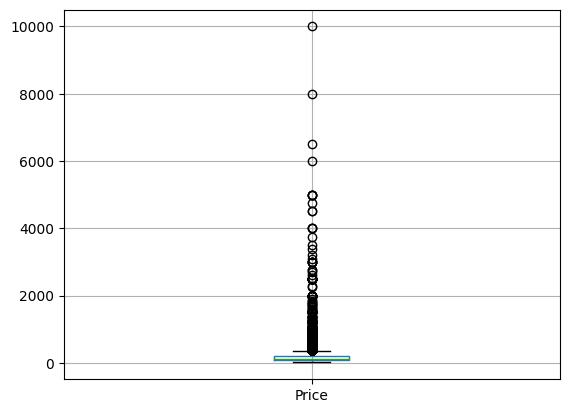

In [ ]:
#airbnb['Price'].boxplot()
airbnb.boxplot('Price')

Axes(0.125,0.11;0.775x0.77)


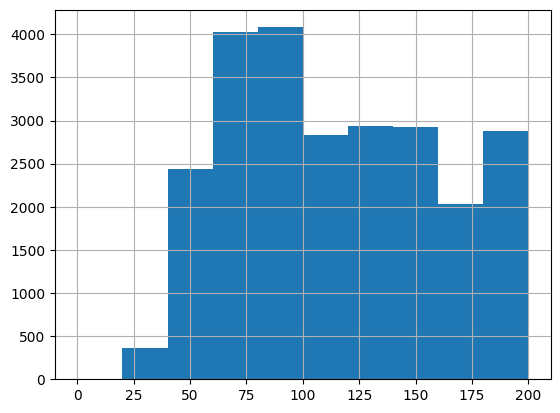

In [ ]:
print(airbnb['Price'].hist(range = [0,200]))

Axes(0.125,0.11;0.775x0.77)


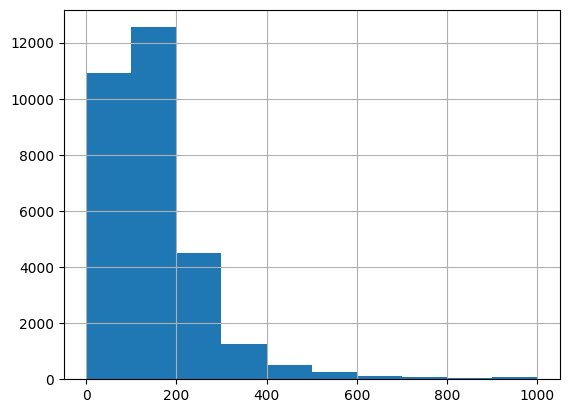

In [ ]:
print(airbnb['Price'].hist(range = [0,1000]))

Axes(0.125,0.11;0.775x0.77)


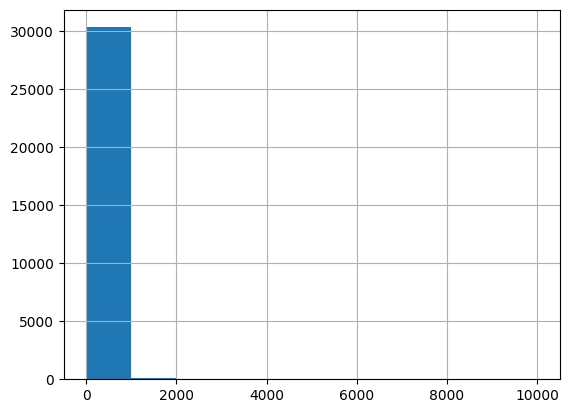

In [ ]:
print(airbnb['Price'].hist(range = [0,10000]))

I'm a little skeptical about some of the really expensive and really cheap data, but maybe some people are really buying $10,000/night airbnbs

In [4]:
import pandas as pd
import numpy as np

In [7]:
sharks = pd.read_csv('/content/wrangling/assignment/data/sharks.csv', low_memory = False)
sharks.head() #look at the data/get an idea of where things are
print(sharks.shape)
sharks['Type'].describe() #look at the 'Type' column specifically


(6462, 257)


count           6457
unique            12
top       Unprovoked
freq            4716
Name: Type, dtype: object

In [8]:
print(sharks.columns.to_list()) #look at all of the columns

['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Unnamed: 9', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69', 'Unna

In [11]:
print(sharks['Type'].unique(), '\n') #look at all of the different types of attacks -- we can see that there is one with a type 'Boatomg' which is proabably boating
print(sharks['Type'].value_counts(), '\n') #see all of the counts/type, seems like we could consolidate some (eg. boat, boating, boatomg, and watercraft)
#print(sharks['Type'].hist(), '\n') #look at the data via plot (ugly histogram, fix with ...)


['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



In [13]:
shar = sharks['Type'] #while i'm messing with the type variable, it will be easier to have it in its own variable
shar = shar.replace(['Boat', 'Boating', 'Sea Disaster', 'Boatomg'], 'Watercraft') #group all of the boating/watercraft accidents, (boatomg doesn't need its own category)
shar.value_counts() #check to see what it looks like now


Unprovoked             4716
Provoked                593
Watercraft              583
Invalid                 552
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Name: Type, dtype: int64

In [17]:
shar = shar.replace(['Unconfirmed', 'Questionable', 'Unverified', 'Under investigation', 'Invalid'], np.nan) #these all convey uncertaintly, better to code them as not a value
shar.value_counts() #check to see what it looks like now (not down to provoked, unprovokes, and watercraft!!)

Unprovoked    4716
Provoked       593
Watercraft     583
Name: Type, dtype: int64

In [20]:
sharks['Type'] = shar #put consolidated version back into the original dataframe
sharks

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,6457,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,6458,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,6459,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,6460,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import pandas as pd
import numpy as np

In [22]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
trial = pd.read_csv(url,low_memory=False)

In [23]:
trial['WhetherDefendantWasReleasedPretrial'].describe()

count    22986.000000
mean         0.845428
std          0.477276
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: WhetherDefendantWasReleasedPretrial, dtype: float64

In [24]:
trial = trial.rename(columns = {'WhetherDefendantWasReleasedPretrial': 'rel'})
print(trial['rel'].describe(), '\n')

print(trial['rel'].isnull().sum(), '\n')

print(trial['rel'].value_counts()) #seems like they should all be one or zero since the people either have been released or not... check codebook
# a value of 9 means that it is unclear, we can replace with np.nan if we want! (luckily there are no other wierd values)

count    22986.000000
mean         0.845428
std          0.477276
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: rel, dtype: float64 

0 

1    19154
0     3801
9       31
Name: rel, dtype: int64


In [25]:
trial['rel'] = trial['rel'].replace(9,np.nan) #replace 9 with np.nan

In [26]:
print(trial['rel'].isnull().sum(), '\n') #see how many null values there are
print(trial['rel'].value_counts()) #look at the rest of the types

31 

1.0    19154
0.0     3801
Name: rel, dtype: int64


array([[<Axes: title={'center': 'rel'}>]], dtype=object)

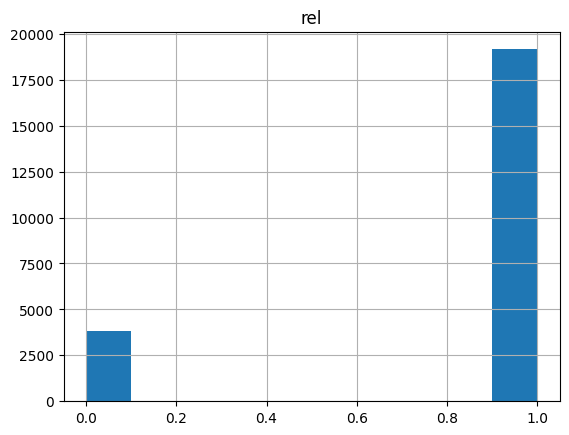

In [27]:
trial.hist('rel') # i just wanted to visualize it

In [29]:
trial = trial.rename(columns = {'rel' :'WhetherDefendantWasReleasedPretrial'}) #put the name back to the original so it is consistent with the codebook

In [ ]:
trial['ImposedSentenceAllChargeInContactEvent'].describe

<bound method NDFrame.describe of 0                        
1                      60
2                      12
3        .985626283367556
4                        
               ...       
22981                    
22982                    
22983                    
22984                    
22985                    
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: object>

In [ ]:
trial = trial.rename(columns = {'ImposedSentenceAllChargeInContactEvent': 'sen'})
trial = trial.rename(columns = {'SentenceTypeAllChargesAtConvictionInContactEvent': 'type'})
print(trial['sen'].describe(), '\n')
print(trial['sen'].head(), '\n')
print(trial['sen'].isnull().sum())

count     22986
unique      484
top            
freq       9053
Name: sen, dtype: object 

0                    
1                  60
2                  12
3    .985626283367556
4                    
Name: sen, dtype: object 

0


In [ ]:
sen = trial['sen']
type = trial['type']

In [ ]:
sen = pd.to_numeric(sen,errors='coerce')
sen.describe()

count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: sen, dtype: float64

In [ ]:
trial.loc[0:10,('sen','type')] # it looks like the imposed sentence is missing when the sentence type is coded as 9 or 4
#when checking the codebook, 4 means other/dismissed, and 9 means n/a

,sen,type
0,,9
1,60,0
2,12,1
3,.985626283367556,1
4,,4
5,12,0
6,36,1
7,6,0
8,24,1
9,12,1


In [ ]:
NAsen = sen.isnull() #making a dummy variable to hold them empty values
print(NAsen.sum())
#that is a lot of values that are either no sentence or a missing sentence

9053


In [ ]:
pd.crosstab(NAsen, type) #just checking that when the values are null, they are in the 4 and 9 of type

type,0,1,2,4,9
sen,,,,,
False,8720,4299,914,0,0
True,0,0,0,8779,274


In [ ]:
sen = sen.mask(type ==4 , 0 ) #we use .mask to change the values of the sentence when the type is a certain value (when type =4, make sen = 0)
sen = sen.mask(type ==9 , np.nan ) #when the type is missing, replace the value with nan


In [ ]:
NAsen = sen.isnull() #making a dummy variable again to see if we fixed some things
print(NAsen.sum())

274


In [ ]:
pd.crosstab(NAsen, type) #this looks good

type,0,1,2,4,9
sen,,,,,
False,8720,4299,914,8779,0
True,0,0,0,0,274


In [ ]:
trial['ImposedSentenceAllChargeInContactEvent'] = sen #put the cleaned data back into the original dataframe

**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?